<a href="https://colab.research.google.com/github/HalukSumen/MovingtoNYC/blob/main/MovingtoNYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><center>MOVING TO NEW YORK CITY</center>

# 1.LIBRARIES

In [ ]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.max_columns = 30
#pd.options.display.max_rows = 400
!pip install geocoder 
import requests # library to handle requests
import json # library to handle JSON files
import urllib.request  # for opening and reading URLs
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import seaborn as sns  # data visualization library 
from matplotlib import pyplot as plt #plotting
from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library
import folium # for create maps
from sklearn.cluster import KMeans #  k-means from clustering stage
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported!')

     |████████████████████████████████| 102kB 9.4MB/s 
Libraries imported!


# 2.DATA

Firstly downloading data from New York University Spatial Data Repository
https://geo.nyu.edu/catalog/nyu_2451_34572

In [ ]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [ ]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [ ]:
neighborhood_list = newyork_data['features']

In [ ]:
#Examining the first item
neighborhood_list[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

# 3.DATA CLEANING & PREPARATION & CONTROLLING

In [ ]:
#define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

#create the dataframe
neighborhoods = pd.DataFrame(columns=column_names)



In [ ]:
#quick look of neighborhoods dataframe, it should be 4 columns and 0 row
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [ ]:
 #Importing data to dataframe
for data in neighborhood_list:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [ ]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [ ]:
print('The dataframe has {} boroughs.'.format(len(neighborhoods['Borough'].unique())))
print('The dataframe has {} neighborhoods.'.format(neighborhoods.shape[0]))

The dataframe has 5 boroughs.
The dataframe has 306 neighborhoods.


In [ ]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="New York")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


## 3.1.Map of All Neighborhoods in the New York

In [ ]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## 3.2.Connecting Fourquare API & Downloading Venue Data

In [ ]:
'''
Go to your "App Settings" page on the developer console of Foursquare.com
Set the "Redirect URL" under "Web Addresses" to https://www.google.com Paste and enter the following url in your web browser (replace YOUR_CLIENT_ID with your actual client id):
Replace YOUR_CLIENT_ID with your actual client id: https://foursquare.com/oauth2/authenticate?client_id=YOUR_CLIENT_ID&response_type=code&redirect_uri=https://www.google.com 
Take note at the CODE https://www.google.com/?code=CODE
Replace placeholders with values: https://foursquare.com/oauth2/access_token?client_id=YOUR_CLIENT_ID&client_secret=YOUR_CLIENT_SECRET&grant_type=authorization_code&redirect_uri=https://www.google.com&code=CODE. 
'''

'\nGo to your "App Settings" page on the developer console of Foursquare.com\nSet the "Redirect URL" under "Web Addresses" to https://www.google.com Paste and enter the following url in your web browser (replace YOUR_CLIENT_ID with your actual client id):\nReplace YOUR_CLIENT_ID with your actual client id: https://foursquare.com/oauth2/authenticate?client_id=YOUR_CLIENT_ID&response_type=code&redirect_uri=https://www.google.com \nTake note at the CODE https://www.google.com/?code=CODE\nReplace placeholders with values: https://foursquare.com/oauth2/access_token?client_id=YOUR_CLIENT_ID&client_secret=YOUR_CLIENT_SECRET&grant_type=authorization_code&redirect_uri=https://www.google.com&code=CODE. \n'

In [1]:
CLIENT_ID = '' # Foursquare ID
CLIENT_SECRET = '' #  Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [ ]:
# function that extracts categories of the venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
def getNearbyVenues(names, 
                    latitudes, 
                    longitudes, 
                    radius=1000, 
                    LIMIT=1000):
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the request URL for API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # returning only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    return(nearby_venues)

In [ ]:
#approximately 3 min.
newyork_venues = getNearbyVenues(names=neighborhoods['Neighborhood'], 
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                 )

# 4.DATA EXAMINATION

In [ ]:
newyork_venues.shape

(20009, 7)

In [ ]:
newyork_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,T-Mobile,40.891247,-73.851374,Mobile Phone Shop


In [ ]:
#Controlling any duplicate values
duplicate = newyork_venues[newyork_venues.duplicated()] 
print("Duplicate Rows :")  
duplicate 

Duplicate Rows :


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [ ]:
#Controlling any NaN values.
newyork_venues.isnull().sum()

Neighborhood              0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
Venue Latitude            0
Venue Longitude           0
Venue Category            0
dtype: int64

In [ ]:
#Examining First 20 row Forsquare Data 
newyork_venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,T-Mobile,40.891247,-73.851374,Mobile Phone Shop
5,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
6,Wakefield,40.894705,-73.847201,Jimbo's,40.891740,-73.858226,Burger Joint
7,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant,40.898083,-73.850259,Caribbean Restaurant
8,Wakefield,40.894705,-73.847201,Subway,40.890468,-73.849152,Sandwich Place
9,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy


In [ ]:
#Examining how many and which type of restaurants exist in New York City
newyork_restaurants_only = newyork_venues[newyork_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
newyork_restaurants_only.index = np.arange(1, len(newyork_restaurants_only)+1)
newyork_restaurants_only['Venue Category'].value_counts().head(20)

Italian Restaurant               500
Chinese Restaurant               365
Mexican Restaurant               299
Fast Food Restaurant             265
American Restaurant              264
Sushi Restaurant                 203
Caribbean Restaurant             195
Japanese Restaurant              186
Latin American Restaurant        139
Indian Restaurant                133
Seafood Restaurant               133
Restaurant                       129
Thai Restaurant                  122
Asian Restaurant                 107
Spanish Restaurant                98
Korean Restaurant                 97
Greek Restaurant                  86
French Restaurant                 81
Middle Eastern Restaurant         72
Vegetarian / Vegan Restaurant     65
Name: Venue Category, dtype: int64

In [ ]:
print('There are {} restaurants.'.format(len(newyork_restaurants_only['Venue Category'])))
print('There are {} unique categories of restaurants.'.format(len(newyork_restaurants_only['Venue Category'].unique())))

There are 4401 restaurants.
There are 94 unique categories of restaurants.


In [ ]:
#creating dataframe for top 20 restaurants in New York boroughs
ny_top20_restaurants = newyork_restaurants_only['Venue Category'].value_counts()[0:20].to_frame(name='Frequency')
ny_top20_restaurants = ny_top20_restaurants.reset_index()
ny_top20_restaurants.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
ny_top20_restaurants

,Venue Category,Frequency
0,Italian Restaurant,500
1,Chinese Restaurant,365
2,Mexican Restaurant,299
3,Fast Food Restaurant,265
4,American Restaurant,264
5,Sushi Restaurant,203
6,Caribbean Restaurant,195
7,Japanese Restaurant,186
8,Latin American Restaurant,139
9,Indian Restaurant,133


# 5.DATA VISUALIZATION

## 5.1.Top 20 Restaurant Types in New York

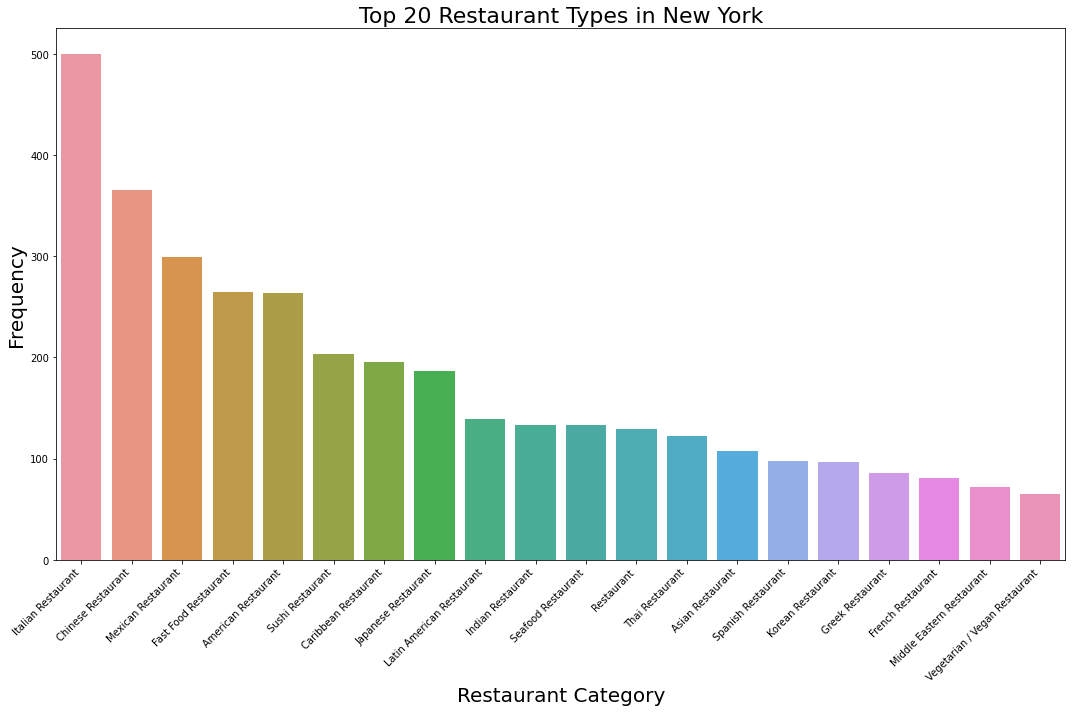

In [ ]:
fig = plt.figure(figsize=(15,10))
s=sns.barplot(x="Venue Category", y="Frequency", data=ny_top20_restaurants)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Top 20 Restaurant Types in New York', fontsize=22)
plt.xlabel("Restaurant Category", fontsize=20)
plt.ylabel ("Frequency", fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
print("Shape of the Data-Frame with Venue Category only Restaurant: ", newyork_restaurants_only.shape)

Shape of the Data-Frame with Venue Category only Restaurant:  (4401, 7)


In [ ]:
newyork_restaurants_only.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant,40.898083,-73.850259,Caribbean Restaurant
5,Wakefield,40.894705,-73.847201,McDonald's,40.889435,-73.843369,Fast Food Restaurant


In [ ]:
#Neighborhoods contains how many restaurants
ny_restaurants_only = newyork_restaurants_only.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
ny_restaurants_only.head(20)

Neighborhood
Allerton               8
Annadale               2
Arden Heights          2
Arlington              3
Arrochar               5
Arverne                2
Astoria               36
Astoria Heights        9
Auburndale            31
Bath Beach            27
Battery Park City      7
Bay Ridge             27
Bay Terrace           13
Baychester            13
Bayside               29
Bayswater              1
Bedford Park           6
Bedford Stuyvesant    21
Beechhurst            11
Bellaire              11
Name: Venue Category, dtype: int64

In [ ]:
ny_restaurants_only.shape

(297,)

In [ ]:
ny_restaurants_only_df  = ny_restaurants_only.to_frame().reset_index()
ny_restaurants_only_df.columns = ['Neighborhood', 'Number of Restaurant']
ny_restaurants_only_df.index = np.arange(1, len(ny_restaurants_only_df)+1)
list_rest_no =ny_restaurants_only_df['Number of Restaurant'].to_list()
list_dist =ny_restaurants_only_df['Neighborhood'].to_list()

In [ ]:
# one hot encoding
ny_onehot = pd.get_dummies(newyork_restaurants_only[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = newyork_restaurants_only['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.shape

(4401, 95)

In [ ]:
ny_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Puerto Rican Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salvadoran Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()

In [ ]:
ny_grouped.head(20)

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Puerto Rican Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salvadoran Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,Allerton,0.0,0.0,0.125000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.125000,0.000000,0.125000,0.0,0.000000,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.000000,0.375000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1,Annadale,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
2,Arden Heights,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
3,Arlington,0.0,0.0,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.

## 5.2.Top 10 Restaurant Types in New York's Neigborhoods



In [ ]:
#Creating table for every neighborhood with Top10 Restaurant Types
num_top_venues = 10          

for hood in ny_grouped['Neighborhood']:
    print("############ "+hood+" ############")
    temp = ny_grouped[ny_grouped['Neighborhood'] == hood].T.reset_index()  #transposing the index
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print("----------------------------------")
    print('\n')

############ Allerton ############
                             Venue  Frequency
0             Fast Food Restaurant       0.38
1             Caribbean Restaurant       0.12
2      Eastern European Restaurant       0.12
3               Chinese Restaurant       0.12
4               Mexican Restaurant       0.12
5              American Restaurant       0.12
6          Modern Greek Restaurant       0.00
7  Molecular Gastronomy Restaurant       0.00
8               Seafood Restaurant       0.00
9          Scandinavian Restaurant       0.00
----------------------------------


############ Annadale ############
                     Venue  Frequency
0               Restaurant        1.0
1        Afghan Restaurant        0.0
2        Paella Restaurant        0.0
3       Russian Restaurant        0.0
4         Ramen Restaurant        0.0
5  Puerto Rican Restaurant        0.0
6    Portuguese Restaurant        0.0
7        Polish Restaurant        0.0
8      Peruvian Restaurant        0.0
9      

In [ ]:
#Creating new table according the top venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
indicators = ['st', 'nd', 'rd']

#creating columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

ny_restaurant_sorted = pd.DataFrame(columns=columns)
ny_restaurant_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    ny_restaurant_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

ny_restaurant_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Fast Food Restaurant,American Restaurant,Eastern European Restaurant,Mexican Restaurant,Chinese Restaurant,Caribbean Restaurant,Himalayan Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
1,Annadale,Restaurant,Yemeni Restaurant,Hawaiian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
2,Arden Heights,Mexican Restaurant,Sushi Restaurant,Yemeni Restaurant,Hawaiian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
3,Arlington,Fast Food Restaurant,American Restaurant,Yemeni Restaurant,Himalayan Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
4,Arrochar,Italian Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Polish Restaurant,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
5,Arverne,French Restaurant,Caribbean Restaurant,Yemeni Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
6,Astoria,Greek Restaurant,Middle Eastern Restaurant,Italian Restaurant,Indian Restaurant,Seafood Restaurant,Thai Restaurant,Mexican Restaurant,Restaurant,Brazilian Restaurant,Falafel Restaurant
7,Astoria Heights,Italian Restaurant,Greek Restaurant,Indian Restaurant,Chinese Restaurant,Sushi Restaurant,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
8,Auburndale,Korean Restaurant,Greek Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Asian Restaurant,Fast Food Restaurant,Thai Restaurant
9,Bath Beach,Sushi Restaurant,Asian Restaurant,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Cantonese Restaurant,Hong Kong Restaurant,Restaurant,German Restaurant


In [ ]:
ny_grouped_clustering = ny_grouped.drop('Neighborhood', 1)
ny_grouped_clustering.head(20)

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Puerto Rican Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salvadoran Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,0.0,0.0,0.125000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.125000,0.000000,0.125000,0.0,0.000000,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.000000,0.375000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0000

# 6.PROCESSING

## 6.1.K - Means

### 6.1.1.Elbow Method

In [ ]:
#defining parameters of K-Means
kmeans_kwargs = {
    "init": "k-means++",        #default random 
    "n_init": 10,               #default 10
    "max_iter": 300,            #default 300
    "random_state": 42,         #default None
}

In [ ]:
#Elbow Method
within_cluster_sum_of_squares = []
K = range(1,25)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(ny_grouped_clustering)
    within_cluster_sum_of_squares.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

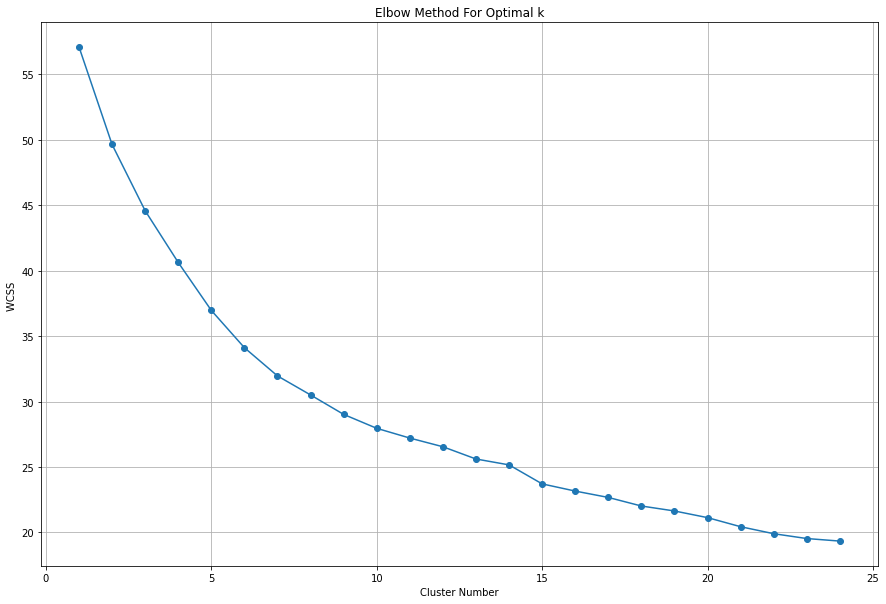

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(K, within_cluster_sum_of_squares, marker='o')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS ')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

### 6.1.2.Silhouette Score

In [ ]:
'''
'euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 
'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao',
'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski', 'nan_euclidean', 'haversine'], or 'precomputed', or a callable
'''

from sklearn.metrics import silhouette_score

silhouette = []
K_silhouette = range(2,30)
# minimum 2 clusters required, to define dissimilarity
for k in K_silhouette:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(ny_grouped_clustering)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(ny_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

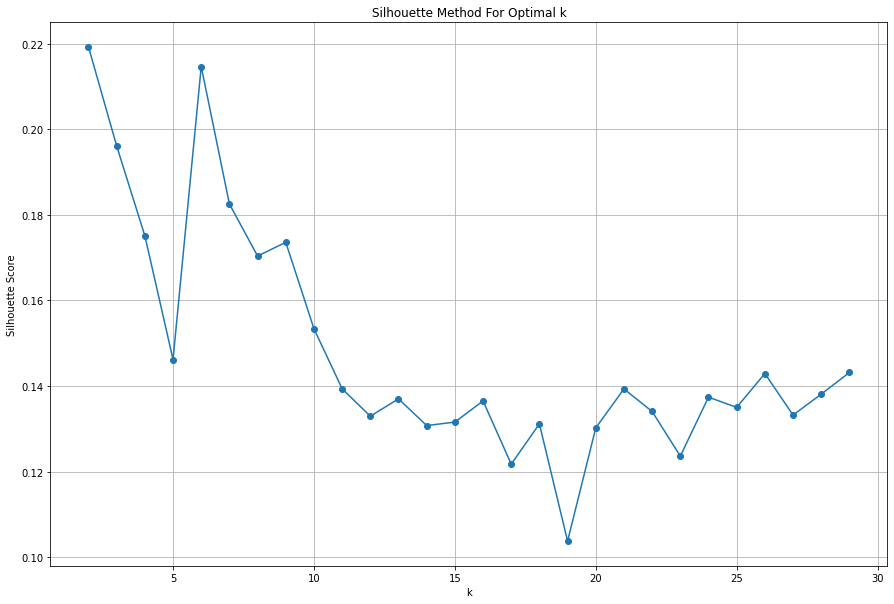

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(K_silhouette, silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.grid()
plt.show()

In [ ]:
# number of clusters
k = 7
ny_grouped_clustering = ny_grouped.drop('Neighborhood', 1)
# k-means clustering
kmeans = KMeans(n_clusters=k, **kmeans_kwargs).fit(ny_grouped_clustering)

In [ ]:
try:
    ny_restaurant_sorted.drop('Cluster Labels', axis=1)
except:
    ny_restaurant_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [ ]:
ny_restaurant_sorted.head(20)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Allerton,Fast Food Restaurant,American Restaurant,Eastern European Restaurant,Mexican Restaurant,Chinese Restaurant,Caribbean Restaurant,Himalayan Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
1,5,Annadale,Restaurant,Yemeni Restaurant,Hawaiian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
2,5,Arden Heights,Mexican Restaurant,Sushi Restaurant,Yemeni Restaurant,Hawaiian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
3,1,Arlington,Fast Food Restaurant,American Restaurant,Yemeni Restaurant,Himalayan Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
4,2,Arrochar,Italian Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Polish Restaurant,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
5,3,Arverne,French Restaurant,Caribbean Restaurant,Yemeni Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
6,4,Astoria,Greek Restaurant,Middle Eastern Restaurant,Italian Restaurant,Indian Restaurant,Seafood Restaurant,Thai Restaurant,Mexican Restaurant,Restaurant,Brazilian Restaurant,Falafel Restaurant
7,2,Astoria Heights,Italian Restaurant,Greek Restaurant,Indian Restaurant,Chinese Restaurant,Sushi Restaurant,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
8,4,Auburndale,Korean Restaurant,Greek Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Asian Restaurant,Fast Food Restaurant,Thai Restaurant
9,4,Bath Beach,Sushi Restaurant,Asian Restaurant,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Cantonese Restaurant,Hong Kong Restaurant,Restaurant,German Restaurant


In [ ]:
#merging two dataframe 
ny_merged = neighborhoods
ny_merged = ny_merged.join(ny_restaurant_sorted.set_index('Neighborhood'), on='Neighborhood')
ny_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,3.0,Caribbean Restaurant,Fast Food Restaurant,Spanish Restaurant,Chinese Restaurant,Yemeni Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
1,Bronx,Co-op City,40.874294,-73.829939,5.0,Fast Food Restaurant,Caribbean Restaurant,Mexican Restaurant,Seafood Restaurant,Spanish Restaurant,Chinese Restaurant,Restaurant,American Restaurant,Indonesian Restaurant,Israeli Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,3.0,Caribbean Restaurant,Fast Food Restaurant,Seafood Restaurant,Asian Restaurant,Yemeni Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
3,Bronx,Fieldston,40.895437,-73.905643,5.0,Mexican Restaurant,Fast Food Restaurant,Chinese Restaurant,Greek Restaurant,Tapas Restaurant,Sushi Restaurant,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant,Filipino Restaurant
4,Bronx,Riverdale,40.890834,-73.912585,5.0,Mexican Restaurant,Japanese Restaurant,Korean Restaurant,Greek Restaurant,Tapas Restaurant,Restaurant,Israeli Restaurant,Jewish Restaurant,Ethiopian Restaurant,Falafel Restaurant


In [ ]:
ny_merged.shape

(306, 15)

# 7.RESULT

## 7.1.Cluster Map of Neighborhoods

In [ ]:
# create mapping for all clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
kclusters = 7
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Neighborhood'], ny_restaurant_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [ ]:
# Creating new dataframes for visualization each cluster
df_cluster0 = ny_merged.loc[ny_merged['Cluster Labels'] == 0]
df_cluster1 = ny_merged.loc[ny_merged['Cluster Labels'] == 1]
df_cluster2 = ny_merged.loc[ny_merged['Cluster Labels'] == 2]
df_cluster3 = ny_merged.loc[ny_merged['Cluster Labels'] == 3]
df_cluster4 = ny_merged.loc[ny_merged['Cluster Labels'] == 4]
df_cluster5 = ny_merged.loc[ny_merged['Cluster Labels'] == 5]
df_cluster6 = ny_merged.loc[ny_merged['Cluster Labels'] == 6]

## 7.2.Cluster 0

In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 0]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
172,Queens,Breezy Point,40.557401,-73.925512,0.0,American Restaurant,Yemeni Restaurant,Himalayan Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
204,Staten Island,South Beach,40.580247,-74.079553,0.0,American Restaurant,Yemeni Restaurant,Himalayan Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
219,Staten Island,Silver Lake,40.619193,-74.096290,0.0,American Restaurant,Yemeni Restaurant,Himalayan Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant


In [ ]:
# create map of clusters 0
map_df0 = folium.Map(location=[latitude, longitude], zoom_start=11)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Cluster 0</b></h3>
             '''
# add markers to map
for lat, lng, borough, neighborhood in zip(df_cluster0['Latitude'], df_cluster0['Longitude'], df_cluster0['Borough'], df_cluster0['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_df0)  
map_df0.get_root().html.add_child(folium.Element(title_html))
map_df0

## 7.3.Cluster 1

In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 1]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Bronx,University Heights,40.855727,-73.910416,1.0,Fast Food Restaurant,Latin American Restaurant,Spanish Restaurant,Restaurant,Chinese Restaurant,Halal Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant
15,Bronx,Morris Heights,40.847898,-73.919672,1.0,Fast Food Restaurant,Spanish Restaurant,Chinese Restaurant,Latin American Restaurant,Asian Restaurant,Mexican Restaurant,Israeli Restaurant,Yemeni Restaurant,Filipino Restaurant,French Restaurant
17,Bronx,East Tremont,40.842696,-73.887356,1.0,Fast Food Restaurant,American Restaurant,Puerto Rican Restaurant,Yemeni Restaurant,Hawaiian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
18,Bronx,West Farms,40.839475,-73.877745,1.0,Fast Food Restaurant,Puerto Rican Restaurant,Yemeni Restaurant,Hawaiian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
23,Bronx,Longwood,40.815099,-73.895788,1.0,Fast Food Restaurant,Latin American Restaurant,Mexican Restaurant,Chinese Restaurant,Spanish Restaurant,Restaurant,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant,Filipino Restaurant
25,Bronx,Morrisania,40.823592,-73.901506,1.0,Fast Food Restaurant,Latin American Restaurant,Italian Restaurant,Spanish Restaurant,Caribbean Restaurant,Yemeni Restaurant,Hawaiian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant
26,Bronx,Soundview,40.821012,-73.865746,1.0,Fast Food Restaurant,Chinese Restaurant,Latin American Restaurant,American Restaurant,Southern / Soul Food Restaurant,Yemeni Restaurant,Hawaiian Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
41,Bronx,Olinville,40.871371,-73.863324,1.0,Fast Food Restaurant,American Restaurant,Chinese Restaurant,Caribbean Restaurant,Seafood Restaurant,Mexican Restaurant,Southern / Soul Food Restaurant,Hawaiian Restaurant,Filipino Restaurant,French Restaurant
71,Brooklyn,Cypress Hills,40.682391,-73.876616,1.0,Fast Food Restaurant,Latin American Restaurant,Himalayan Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant
90,Brooklyn,City Line,40.678570,-73.867976,1.0,Fast Food Restaurant,Latin American Restaurant,Chinese Restaurant,Caribbean Restaurant,South American Restaurant,Yemeni Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant


In [ ]:
# create map of clusters 1
map_df1 = folium.Map(location=[latitude, longitude], zoom_start=11)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Cluster 1</b></h3>
             '''
# add markers to map
for lat, lng, borough, neighborhood in zip(df_cluster1['Latitude'], df_cluster1['Longitude'], df_cluster1['Borough'], df_cluster1['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_df1)  
map_df1.get_root().html.add_child(folium.Element(title_html))
map_df1

## 7.4.Cluster 2

In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 2]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Bronx,Fordham,40.860997,-73.896427,2.0,Italian Restaurant,Spanish Restaurant,Fast Food Restaurant,Vietnamese Restaurant,American Restaurant,Latin American Restaurant,Restaurant,Chinese Restaurant,Yemeni Restaurant,Halal Restaurant
28,Bronx,Throgs Neck,40.815109,-73.816350,2.0,Italian Restaurant,American Restaurant,Asian Restaurant,Yemeni Restaurant,Himalayan Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
34,Bronx,Belmont,40.857277,-73.888452,2.0,Italian Restaurant,Spanish Restaurant,Latin American Restaurant,American Restaurant,Japanese Restaurant,Eastern European Restaurant,Mexican Restaurant,Yemeni Restaurant,Halal Restaurant,Fast Food Restaurant
38,Bronx,Schuylerville,40.826580,-73.826203,2.0,Italian Restaurant,American Restaurant,Chinese Restaurant,Latin American Restaurant,Fast Food Restaurant,Mexican Restaurant,Yemeni Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
39,Bronx,Edgewater Park,40.821986,-73.813885,2.0,Italian Restaurant,Latin American Restaurant,American Restaurant,Asian Restaurant,Mexican Restaurant,Yemeni Restaurant,Himalayan Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
91,Brooklyn,Bergen Beach,40.615150,-73.898556,2.0,American Restaurant,Italian Restaurant,Yemeni Restaurant,Himalayan Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
107,Manhattan,Upper East Side,40.775639,-73.960508,2.0,Italian Restaurant,Japanese Restaurant,American Restaurant,Seafood Restaurant,Thai Restaurant,Szechuan Restaurant,Latin American Restaurant,Mexican Restaurant,Comfort Food Restaurant,Spanish Restaurant
150,Queens,Whitestone,40.781291,-73.814202,2.0,Italian Restaurant,Japanese Restaurant,Greek Restaurant,Chinese Restaurant,Sushi Restaurant,Asian Restaurant,South American Restaurant,Yemeni Restaurant,Falafel Restaurant,Fast Food Restaurant
174,Queens,Beechhurst,40.792781,-73.804365,2.0,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,South American Restaurant,Greek Restaurant,Chinese Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
179,Queens,Neponsit,40.572037,-73.857547,2.0,Italian Restaurant,Restaurant,Mexican Restaurant,Chinese Restaurant,Hawaiian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant


In [ ]:
# create map of clusters 2
map_df2 = folium.Map(location=[latitude, longitude], zoom_start=11)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Cluster 2</b></h3>
             '''
# add markers to map
for lat, lng, borough, neighborhood in zip(df_cluster2['Latitude'], df_cluster2['Longitude'], df_cluster2['Borough'], df_cluster2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_df2)  
map_df2.get_root().html.add_child(folium.Element(title_html))
map_df2

## 7.5.Cluster 3

In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 3]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,3.0,Caribbean Restaurant,Fast Food Restaurant,Spanish Restaurant,Chinese Restaurant,Yemeni Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,3.0,Caribbean Restaurant,Fast Food Restaurant,Seafood Restaurant,Asian Restaurant,Yemeni Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
9,Bronx,Williamsbridge,40.881039,-73.857446,3.0,Caribbean Restaurant,Seafood Restaurant,American Restaurant,Fast Food Restaurant,Indian Restaurant,Restaurant,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant,Filipino Restaurant
42,Bronx,Pelham Gardens,40.862966,-73.841612,3.0,Caribbean Restaurant,Chinese Restaurant,Italian Restaurant,Spanish Restaurant,Yemeni Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
45,Bronx,Edenwald,40.884561,-73.848083,3.0,Fast Food Restaurant,Caribbean Restaurant,Chinese Restaurant,Yemeni Restaurant,Ethiopian Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
56,Brooklyn,East Flatbush,40.641718,-73.936103,3.0,Caribbean Restaurant,Fast Food Restaurant,Yemeni Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
74,Brooklyn,Canarsie,40.635564,-73.902093,3.0,Caribbean Restaurant,Chinese Restaurant,Fast Food Restaurant,Yemeni Restaurant,Ethiopian Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
75,Brooklyn,Flatlands,40.630446,-73.929113,3.0,Caribbean Restaurant,Chinese Restaurant,Fast Food Restaurant,American Restaurant,Yemeni Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
88,Brooklyn,Prospect Lefferts Gardens,40.658420,-73.954899,3.0,Caribbean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Tapas Restaurant,Ramen Restaurant,Restaurant,Falafel Restaurant,Fast Food Restaurant,Paella Restaurant
165,Queens,St. Albans,40.694445,-73.758676,3.0,Fast Food Restaurant,Chinese Restaurant,Caribbean Restaurant,Yemeni Restaurant,Ethiopian Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant


In [ ]:
# create map of clusters 3
map_df3 = folium.Map(location=[latitude, longitude], zoom_start=11)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Cluster 3</b></h3>
             '''
# add markers to map
for lat, lng, borough, neighborhood in zip(df_cluster3['Latitude'], df_cluster3['Longitude'], df_cluster3['Borough'], df_cluster3['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_df3)  
map_df3.get_root().html.add_child(folium.Element(title_html))
map_df3

## 7.6.Cluster 4

In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 4]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Bronx,Woodlawn,40.898273,-73.867315,4.0,American Restaurant,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Caribbean Restaurant,Yemeni Restaurant,Himalayan Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
12,Bronx,City Island,40.847247,-73.786488,4.0,Seafood Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Japanese Restaurant,French Restaurant,Spanish Restaurant,Yemeni Restaurant,Falafel Restaurant,Fast Food Restaurant
29,Bronx,Country Club,40.844246,-73.824099,4.0,Italian Restaurant,Chinese Restaurant,Fast Food Restaurant,American Restaurant,Latin American Restaurant,Sushi Restaurant,Asian Restaurant,Thai Restaurant,Mexican Restaurant,Yemeni Restaurant
32,Bronx,Van Nest,40.843608,-73.866299,4.0,Spanish Restaurant,Italian Restaurant,Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Thai Restaurant,Caribbean Restaurant,Falafel Restaurant,Fast Food Restaurant
33,Bronx,Morris Park,40.847549,-73.850402,4.0,Italian Restaurant,Spanish Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Sushi Restaurant,Mexican Restaurant,Thai Restaurant,Latin American Restaurant,Asian Restaurant
36,Bronx,North Riverdale,40.908543,-73.904531,4.0,Sushi Restaurant,Italian Restaurant,Chinese Restaurant,American Restaurant,Mexican Restaurant,Restaurant,Yemeni Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
37,Bronx,Pelham Bay,40.850641,-73.832074,4.0,Italian Restaurant,Thai Restaurant,Fast Food Restaurant,Chinese Restaurant,American Restaurant,Latin American Restaurant,Sushi Restaurant,Asian Restaurant,Mexican Restaurant,Yemeni Restaurant
46,Brooklyn,Bay Ridge,40.625801,-74.030621,4.0,Italian Restaurant,Greek Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Indian Restaurant,Chinese Restaurant,American Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant
47,Brooklyn,Bensonhurst,40.611009,-73.995180,4.0,Italian Restaurant,Sushi Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Cantonese Restaurant,Chinese Restaurant,Hotpot Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Korean Restaurant
49,Brooklyn,Greenpoint,40.730201,-73.954241,4.0,Italian Restaurant,French Restaurant,Restaurant,Mexican Restaurant,Polish Restaurant,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,New American Restaurant


In [ ]:
# create map of clusters 4
map_df4 = folium.Map(location=[latitude, longitude], zoom_start=11)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Cluster 4</b></h3>
             '''
# add markers to map
for lat, lng, borough, neighborhood in zip(df_cluster4['Latitude'], df_cluster4['Longitude'], df_cluster4['Borough'], df_cluster4['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_df4)  
map_df4.get_root().html.add_child(folium.Element(title_html))
map_df4

## 7.7.Cluster 5

In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 5]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bronx,Co-op City,40.874294,-73.829939,5.0,Fast Food Restaurant,Caribbean Restaurant,Mexican Restaurant,Seafood Restaurant,Spanish Restaurant,Chinese Restaurant,Restaurant,American Restaurant,Indonesian Restaurant,Israeli Restaurant
3,Bronx,Fieldston,40.895437,-73.905643,5.0,Mexican Restaurant,Fast Food Restaurant,Chinese Restaurant,Greek Restaurant,Tapas Restaurant,Sushi Restaurant,Yemeni Restaurant,Halal Restaurant,Falafel Restaurant,Filipino Restaurant
4,Bronx,Riverdale,40.890834,-73.912585,5.0,Mexican Restaurant,Japanese Restaurant,Korean Restaurant,Greek Restaurant,Tapas Restaurant,Restaurant,Israeli Restaurant,Jewish Restaurant,Ethiopian Restaurant,Falafel Restaurant
5,Bronx,Kingsbridge,40.881687,-73.902818,5.0,Mexican Restaurant,Japanese Restaurant,Spanish Restaurant,Seafood Restaurant,Greek Restaurant,Caribbean Restaurant,Tapas Restaurant,Restaurant,Latin American Restaurant,Indian Restaurant
6,Manhattan,Marble Hill,40.876551,-73.910660,5.0,Mexican Restaurant,Spanish Restaurant,Fast Food Restaurant,Seafood Restaurant,Cuban Restaurant,Thai Restaurant,Chinese Restaurant,Caribbean Restaurant,Yemeni Restaurant,Halal Restaurant
8,Bronx,Norwood,40.877224,-73.879391,5.0,Fast Food Restaurant,Mexican Restaurant,Spanish Restaurant,Caribbean Restaurant,American Restaurant,Chinese Restaurant,Himalayan Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
10,Bronx,Baychester,40.866858,-73.835798,5.0,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Spanish Restaurant,Caribbean Restaurant,Seafood Restaurant,Halal Restaurant,Falafel Restaurant,Filipino Restaurant
13,Bronx,Bedford Park,40.870185,-73.885512,5.0,New American Restaurant,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Caribbean Restaurant,Himalayan Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
20,Bronx,Melrose,40.819754,-73.909422,5.0,Chinese Restaurant,Mexican Restaurant,Fast Food Restaurant,Italian Restaurant,Latin American Restaurant,Seafood Restaurant,Spanish Restaurant,Yemeni Restaurant,Falafel Restaurant,Filipino Restaurant
21,Bronx,Mott Haven,40.806239,-73.916100,5.0,Mexican Restaurant,Restaurant,Spanish Restaurant,Latin American Restaurant,Italian Restaurant,Fast Food Restaurant,Asian Restaurant,Peruvian Restaurant,Yemeni Restaurant,Greek Restaurant


In [ ]:
# create map of clusters 5
map_df5 = folium.Map(location=[latitude, longitude], zoom_start=11)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Cluster 5</b></h3>
             '''
# add markers to map
for lat, lng, borough, neighborhood in zip(df_cluster5['Latitude'], df_cluster5['Longitude'], df_cluster5['Borough'], df_cluster5['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_df5)  
map_df5.get_root().html.add_child(folium.Element(title_html))
map_df5

## 7.8.Cluster 6

In [ ]:
ny_merged.loc[ny_merged['Cluster Labels'] == 6]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Bronx,Pelham Parkway,40.857413,-73.854756,6.0,Chinese Restaurant,Italian Restaurant,Eastern European Restaurant,Sushi Restaurant,Restaurant,Yemeni Restaurant,Greek Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
19,Bronx,High Bridge,40.836623,-73.926102,6.0,Chinese Restaurant,Yemeni Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
24,Bronx,Hunts Point,40.809730,-73.883315,6.0,Chinese Restaurant,Seafood Restaurant,Yemeni Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
72,Brooklyn,East New York,40.669926,-73.880699,6.0,Chinese Restaurant,Caribbean Restaurant,Yemeni Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
76,Brooklyn,Mill Island,40.606336,-73.908186,6.0,Seafood Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Yemeni Restaurant,Hawaiian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
80,Brooklyn,Borough Park,40.633131,-73.990498,6.0,Chinese Restaurant,Restaurant,American Restaurant,Fast Food Restaurant,Dumpling Restaurant,Hawaiian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
85,Brooklyn,Sea Gate,40.576375,-74.007873,6.0,Chinese Restaurant,Yemeni Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
94,Brooklyn,Georgetown,40.623845,-73.916075,6.0,Chinese Restaurant,American Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant,Mexican Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
149,Queens,College Point,40.784903,-73.843045,6.0,Chinese Restaurant,Korean Restaurant,Mexican Restaurant,Seafood Restaurant,Caribbean Restaurant,Latin American Restaurant,Japanese Restaurant,Hawaiian Restaurant,Fast Food Restaurant,Filipino Restaurant
158,Queens,Fresh Meadows,40.734394,-73.782713,6.0,Chinese Restaurant,American Restaurant,Asian Restaurant,Ramen Restaurant,Japanese Restaurant,Mexican Restaurant,Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant


In [ ]:
# create map of clusters 6
map_df6 = folium.Map(location=[latitude, longitude], zoom_start=11)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Cluster 6</b></h3>
             '''
# add markers to map
for lat, lng, borough, neighborhood in zip(df_cluster6['Latitude'], df_cluster6['Longitude'], df_cluster6['Borough'], df_cluster6['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_df6)  
map_df6.get_root().html.add_child(folium.Element(title_html))
map_df6